# Project 2 - Stock Market Analysis

In [40]:
import pandas as pd 

from pandas import Series , DataFrame

import numpy as np 

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [42]:
from pandas.io.data import DataReader

In [43]:
from datetime import datetime

In [44]:
techlist=['AAPL','GOOG','MSFT','AMZN']

In [45]:
end=datetime.now()

start=datetime(end.year-1,end.month,end.day-1)

In [46]:
for stock in techlist:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [47]:
AAPL.describe()


,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,115.190714,116.265873,113.954167,115.116905,4.892222e+07,113.994110
std,11.191652,11.030112,11.287101,11.118337,2.075123e+07,10.490109
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.277499,108.775002,105.769999,106.795000,3.487055e+07,106.549339
50%,116.040001,116.740002,114.459999,115.355000,4.457955e+07,114.292924
75%,125.849998,126.607502,124.827499,125.717502,5.534828e+07,123.847703
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [48]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-27,553.002509,555.282504,548.132463,548.342512,1897400,548.342512
2015-03-30,551.622503,553.472487,548.172490,552.032502,1287500,552.032502
2015-03-31,550.002460,554.712521,546.722468,548.002468,1588000,548.002468
2015-04-01,548.602502,551.142488,539.502472,542.562439,1963000,542.562439
2015-04-02,540.852427,540.852427,533.849395,535.532417,1716300,535.532417


In [49]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-03-27 to 2016-03-28
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


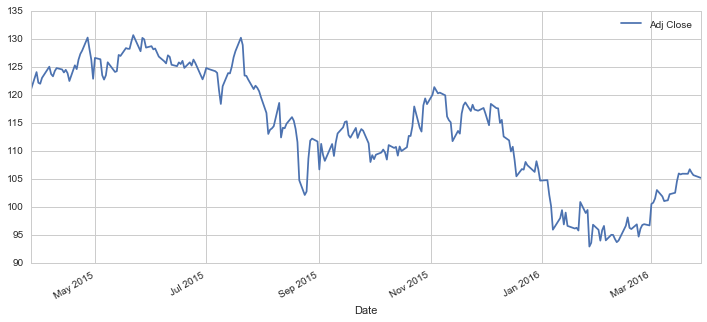

In [50]:
AAPL['Adj Close'].plot(legend=True, figsize=(12,5))

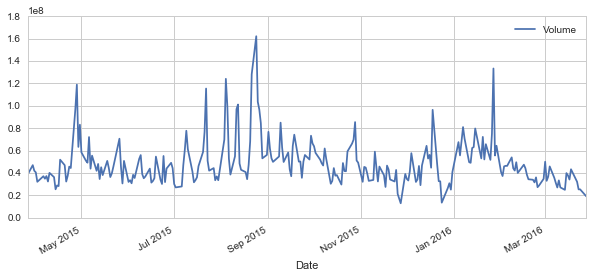

In [51]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [57]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],window=ma)

In [58]:
#AAPL.drop('MA for 50 days',1, inplace=True)

In [60]:
AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2016-03-21,105.930000,107.650002,105.139999,105.910004,35180800,105.910004,103.628001,101.254501,98.287069
2016-03-22,105.250000,107.290001,105.209999,106.720001,32232600,106.720001,104.197001,101.856001,98.492735
2016-03-23,106.480003,107.070000,105.900002,106.129997,25452600,106.129997,104.698000,102.357501,98.655370
2016-03-24,105.470001,106.250000,104.889999,105.669998,25480900,105.669998,105.148000,102.803001,98.780359
2016-03-28,106.000000,106.190002,105.059998,105.190002,19303600,105.190002,105.441000,103.217001,98.946872


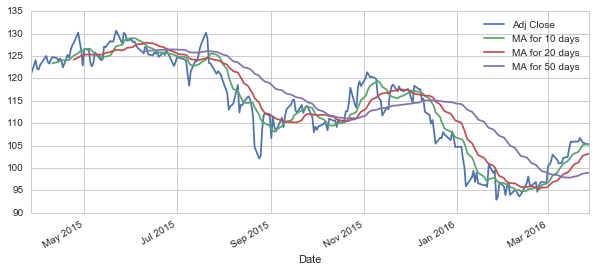

In [61]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

This concludes base-line analysis 

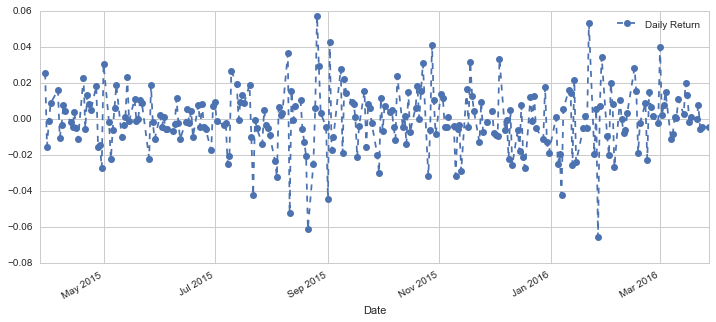

In [62]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')

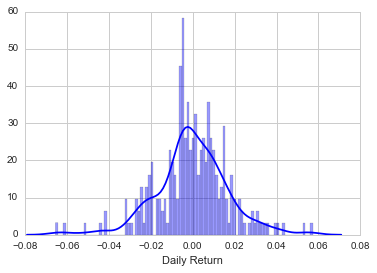

In [63]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [64]:
closing_df=DataReader(techlist,'yahoo',start,end)['Adj Close']

In [65]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-27,121.006860,370.559998,548.342512,39.881698
2015-03-30,124.070079,374.589996,552.032502,39.871962
2015-03-31,122.165384,372.100006,548.002468,39.579932
2015-04-01,121.988660,370.260010,542.562439,39.638339
2015-04-02,123.039186,372.250000,535.532417,39.219761


In [66]:
tech_return=closing_df.pct_change()

In [67]:
tech_return.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-27,NaN,NaN,NaN,NaN
2015-03-30,0.025314,0.010875,0.006729,-0.000244
2015-03-31,-0.015352,-0.006647,-0.007300,-0.007324
2015-04-01,-0.001447,-0.004945,-0.009927,0.001476
2015-04-02,0.008612,0.005375,-0.012957,-0.010560


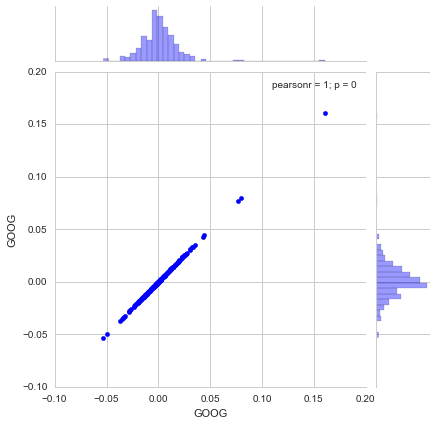

In [72]:
sns.jointplot('GOOG','GOOG',tech_return,kind='scatter',color='blue')

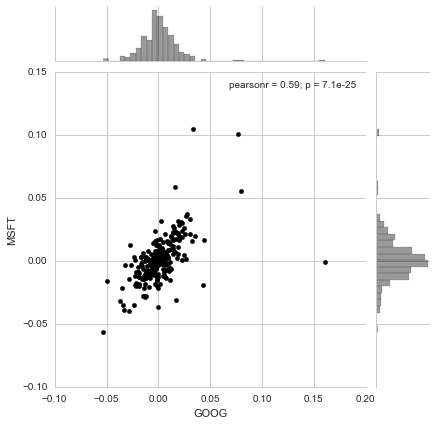

In [74]:
sns.jointplot('GOOG','MSFT',tech_return,kind='scatter',color='black')

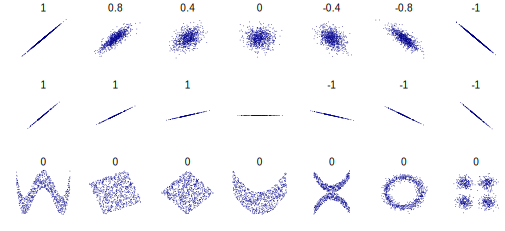

In [75]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

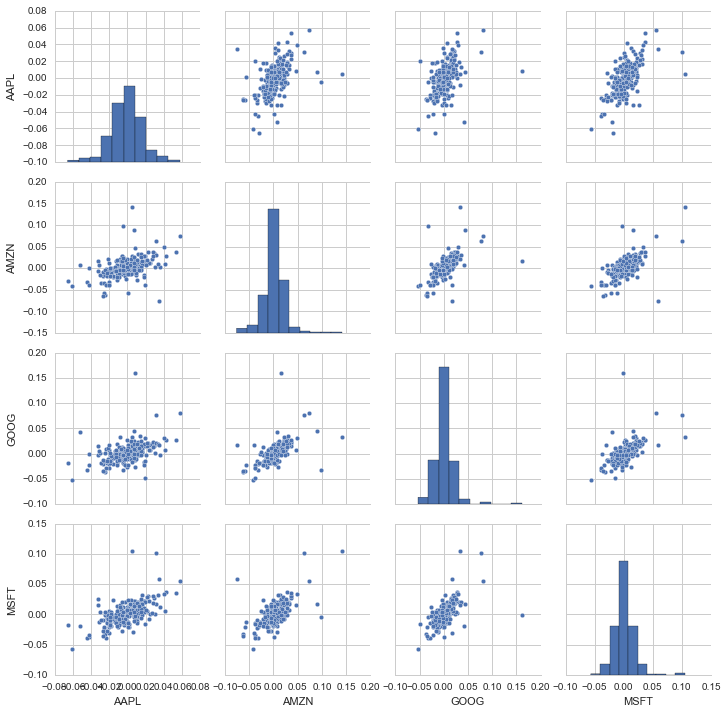

In [76]:
sns.pairplot(tech_return.dropna())

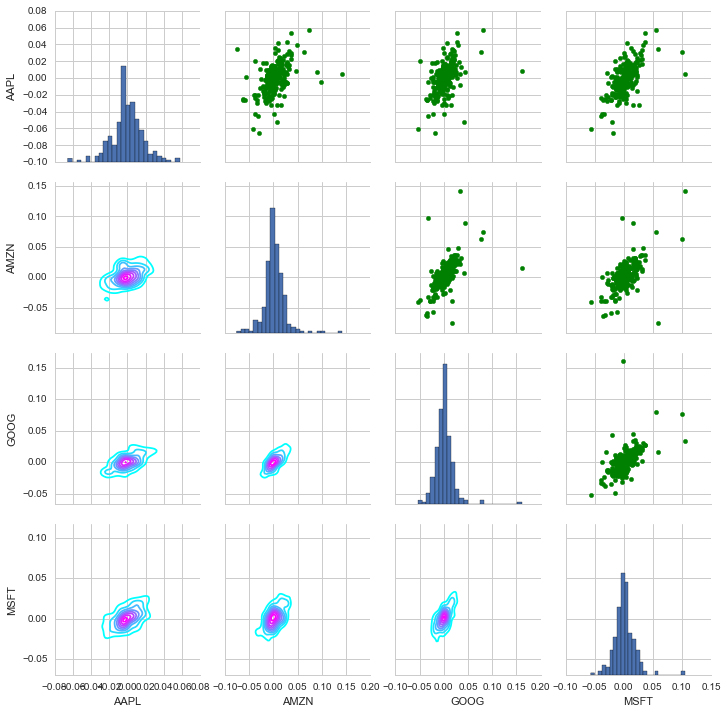

In [80]:
returnFig=sns.PairGrid(tech_return.dropna())

returnFig.map_upper(plt.scatter,color='green')

returnFig.map_lower(sns.kdeplot,cmap='cool')

returnFig.map_diag(plt.hist,bins=25)

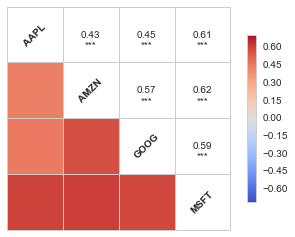

In [83]:
sns.corrplot(tech_return.dropna(),annot=True)

Stock and Risks

In [84]:
returns=tech_return.dropna()

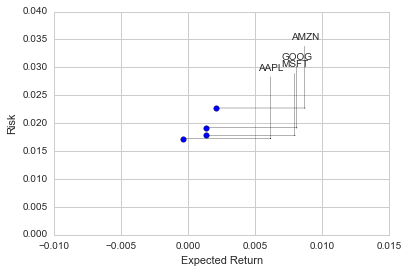

In [101]:
area=np.pi*10

plt.scatter(returns.mean(),returns.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#annotation notes available at : http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (75, 75),
        textcoords = 'offset points', ha = 'left', va = 'top',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'angle,rad=-0.4'))

In [102]:
#Based on criteria , MSFT is the best stock from last year /
